# Observaciones
Las cosas observadas en los notebook que son de importancia se apuntan aquí.

__Cargar librerías y ficheros__

In [17]:
import os
import sys
import getpass
import bz2
import pickle # Rick!

import numpy as np
import pandas as pd
import math

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt

df_5m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_5m.csv")
df_15m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_15m.csv")
df_30m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_30m.csv")
df_45m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_45m.csv")
df_60m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_60m.csv")
df_75m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_75m.csv")
df_90m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_90m.csv")
df_120m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_120m.csv")

def get_medias(x,y):
    data=[]
    vals = np.unique(y)
    for i in vals:
        pos = (i == y)
        data.append(np.mean(x[pos]))
        
    return [data, vals]

## Diferencias entre intervalos temporales

En comparación con los datos con divisiones temporales más pequeñas parece que hay diferencia en los valores pequeños, y casi nada en los grandes. Esto se ve en la comparación de los histogramas de 5m y 1h, y la diferencia en los puntos en __Estimación utilizando los valores  reales de visibilidad__, la diferencia a partir de x=5.5 no es mucha.

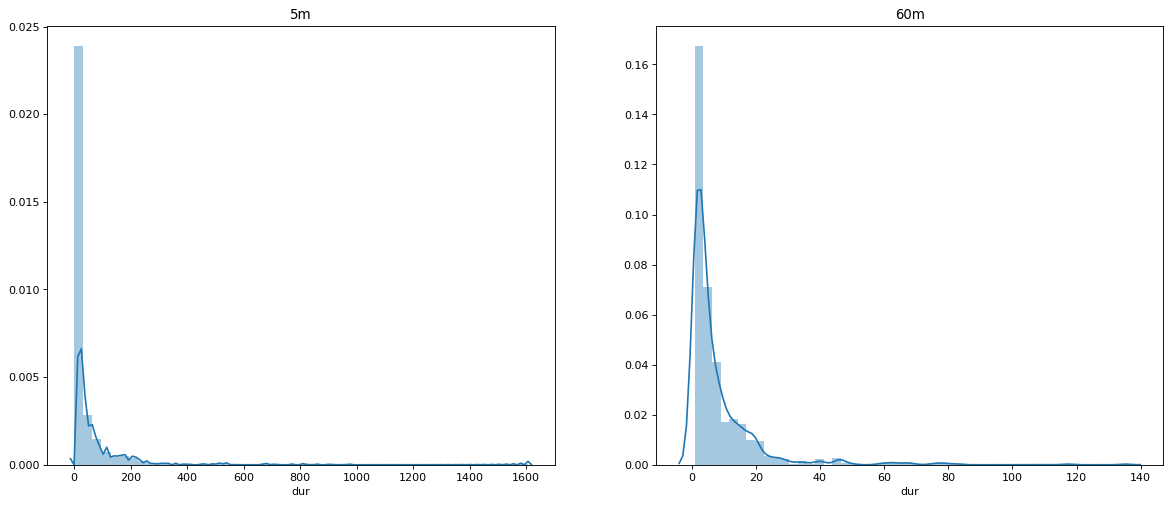

In [10]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1).set_title('5m')
sns.distplot(df_5m.iloc[:,-1])
plt.subplot(2, 2, 2).set_title('60m')
sns.distplot(df_60m.iloc[:,-1])

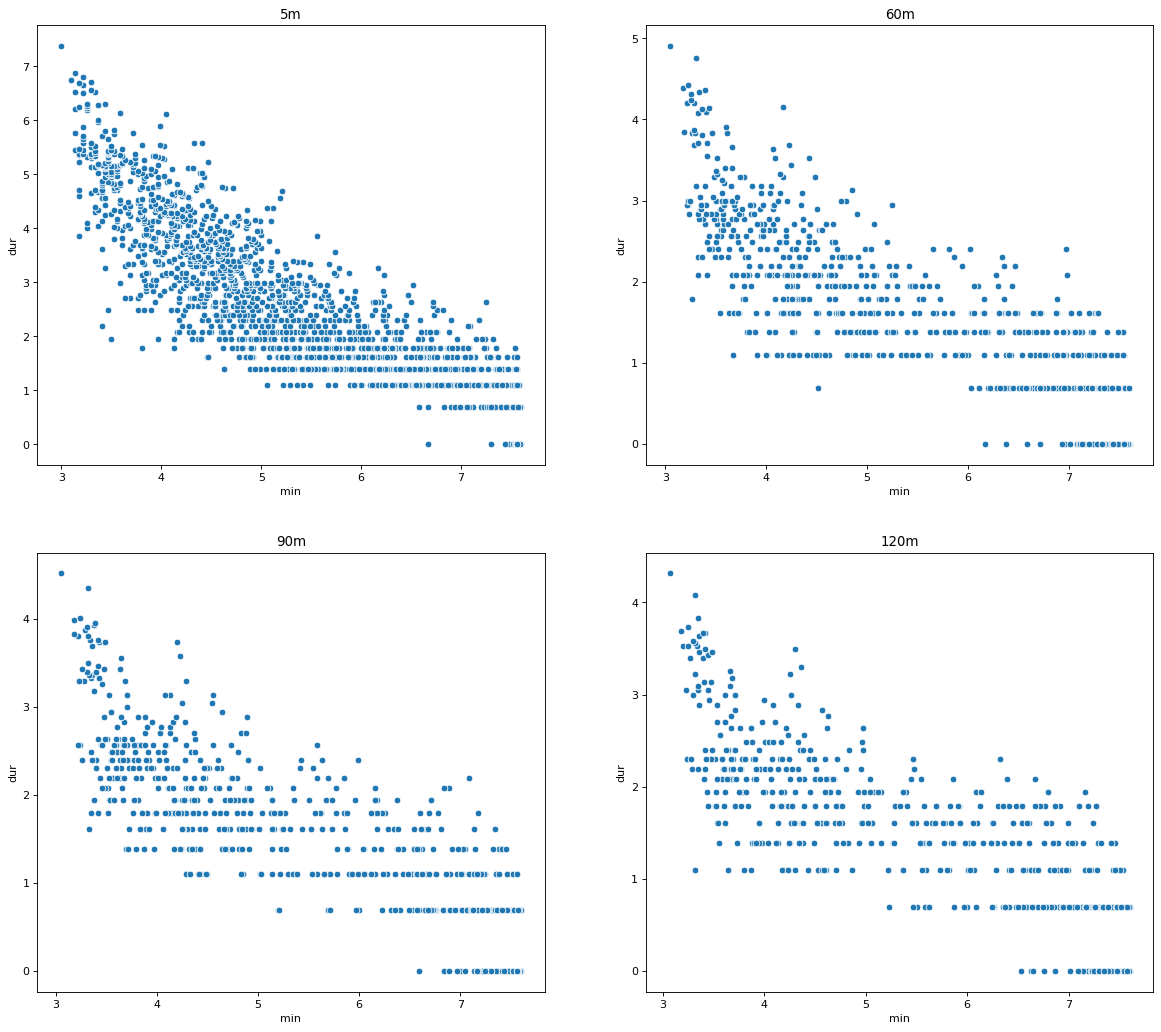

In [33]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1).set_title('5m')
sns.scatterplot(x=np.log(df_5m.iloc[:,-2]),y=np.log(df_5m.iloc[:,-1]))
plt.subplot(2, 2, 2).set_title('60m')
sns.scatterplot(x=np.log(df_60m.iloc[:,-2]),y=np.log(df_60m.iloc[:,-1]))
plt.subplot(2, 2, 3).set_title('90m')
sns.scatterplot(x=np.log(df_90m.iloc[:,-2]),y=np.log(df_90m.iloc[:,-1]))
plt.subplot(2, 2, 4).set_title('120m')
sns.scatterplot(x=np.log(df_120m.iloc[:,-2]),y=np.log(df_120m.iloc[:,-1]))

__TODO__: Arreglar los plots estos

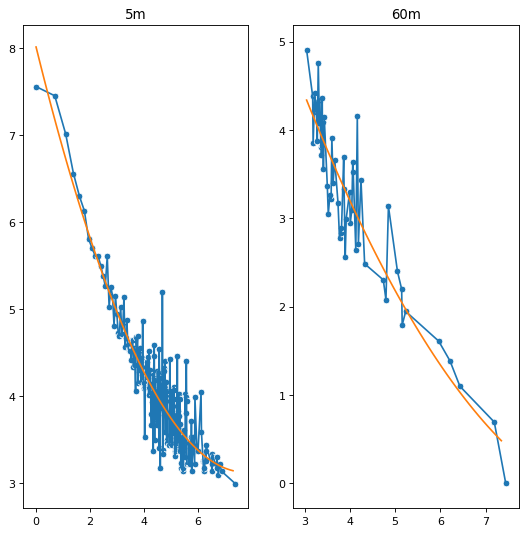

In [28]:
fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1).set_title('5m')
vals, data = get_medias(df_5m.iloc[:,-2], df_5m.iloc[:,-1])
vals, data = np.log(vals), np.log(data)

trend = np.polyfit(x=np.log(vals),y=np.log(data), deg=2)
trendpoly = np.poly1d(trend)
sns.lineplot(x=np.log(vals),y=np.log(data))
sns.scatterplot(x=np.log(vals),y=np.log(data))
sns.lineplot(np.arange(np.min(np.log(vals)),
                       np.max(np.log(vals)),0.1),
             trendpoly(np.arange(np.min(np.log(vals)),
                                 np.max(np.log(vals)),0.1)))

plt.subplot(1, 2, 2).set_title('60m')
vals, data = get_medias(df_60m.iloc[:,-2], df_60m.iloc[:,-1])
trend = np.polyfit(x=np.log(vals),y=np.log(data), deg=2)
trendpoly = np.poly1d(trend)
sns.lineplot(x=np.log(vals),y=np.log(data))
sns.scatterplot(x=np.log(vals),y=np.log(data))
sns.lineplot(np.arange(np.min(np.log(vals)),
                       np.max(np.log(vals)),0.1),
             trendpoly(np.arange(np.min(np.log(vals)),
                                 np.max(np.log(vals)),0.1)))

__Estimación con modelos lineales regularizados__

No van bien. En el mejor caso (Lasso) se iguala el RMSE, y en el resto se empeora.

|Métrica|Modelo lineal|Lasso|Ridge|Elastic Net|
|------|------|---|--|--|
|RMSE|0.5417|0.5417|0.8535|0.6942|